Готовые табицы можно скачать [от сюда](https://drive.google.com/drive/folders/1IC_E-Zw7NybPLD0w6Dhz1lLPabhNR0sP?usp=sharing)

Вот [страница игры](https://rating.chgk.info/)

Вот [API](http://api.rating.chgk.net/)

## Открываем сохраненные файлы


In [66]:
import requests
from tqdm import tqdm
import pickle
from datetime import datetime
import pandas as pd

In [142]:
with open('tournaments.pkl', 'rb') as f:
    tournaments = pickle.load(f)

print('Id турниров, сортированных по возрастанию даты их окончания')
print(len(tournaments))
tournaments[:10]

Id турниров, сортированных по возрастанию даты их окончания
1000


[6953, 6712, 6809, 6910, 6900, 6899, 6021, 6282, 6691, 6952]

In [141]:
with open('results.pkl', 'rb') as f:
    results = pickle.load(f)

print('{турнир : {команда : {\'position\': позиция команды,\n',
      '                     \'teamMembers\': состав команды}}')
print('Количество турниров - {}'.format(len(results)))
print('ID 10 турниров - {}'.format(list(results.keys())[:10]))

{турнир : {команда : {'position': позиция команды,
                      'teamMembers': состав команды}}
Количество турниров - 1000
ID 10 турниров - [6953, 6712, 6809, 6910, 6900, 6899, 6021, 6282, 6691, 6952]


In [139]:
with open('answers.pkl', 'rb') as f:
    answers = pickle.load(f)

print('{турнир : pd.DatFrame с командами и вопросами}')
print('Количество турниров - {}'.format(len(results)))
id_tournament = list(answers.keys())[0]
print('Например для турнира номер {}'.format(id_tournament))
answers[id_tournament]

{турнир : pd.DatFrame с командами и вопросами}
Количество турниров - 1000
Например для турнира номер 6953


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
407,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
62868,1,1,1,0,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1
80492,1,1,1,0,1,1,1,1,1,1,...,1,0,1,1,0,1,1,1,1,1
4989,1,1,1,0,1,1,1,1,1,1,...,1,0,1,1,0,1,1,1,1,1
71566,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53700,0,0,1,0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,1,0
79610,0,0,1,0,1,0,0,1,0,0,...,1,0,1,1,0,0,0,0,1,0
78567,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
66245,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0


In [140]:
with open('players.pkl', 'rb') as f:
    players = pickle.load(f)

print('{Игрок : скилл}')
print('Количество игрков - {}'.format(len(players)))
print('ID 10 игроков - {}'.format(list(players.keys())[:10]))

{Игрок : скилл}
Количество игрков - 61348
ID 10 игроков - [24341, 26173, 29989, 60149, 56814, 14821, 9801, 72160, 86775, 24850]


## Реализуем 2 функции

1) Результат команды по его Id и Id турнира (вернёт -1, если такого не существует)

2) Id участников по Id команды и Id турнира (вернёт пустой лист, если такого не существует)

In [6]:
with open('results.pkl', 'rb') as f:
    RESULTS = pickle.load(f)

def TeamPosInTournament(id_team, id_tournament):
    """
    :param id_team: ID команды
    :param id_tournament: ID турнира
    """
    if id_tournament not in RESULTS or id_team not in RESULTS[id_tournament]:
        return -1
    return results[id_tournament][id_team]['position']

def IdMembersOfTeam(id_team, id_tournament):
    """
    :param id_team: ID команды
    :param id_tournament: ID турнира
    """
    if id_tournament not in RESULTS or id_team not in RESULTS[id_tournament]:
        return -1
    return results[id_tournament][id_team]['teamMembers']

In [7]:
TeamPosInTournament(200, 3579)

1

In [8]:
IdMembersOfTeam(200, 3579)

[35716, 34364, 4372, 23185]

# Тут читается информация про турниров.

In [18]:
endpoint = "http://api.rating.chgk.net/tournaments"
params = {}
response = requests.get(endpoint, params=params)
response

<Response [200]>

In [19]:
my_dict = response.json()

In [20]:
for elem in my_dict: print(elem, f'-> {my_dict[elem]}' if isinstance(my_dict[elem], (int, str)) else f'-> {type(my_dict[elem])} len - {len(my_dict[elem])}')

@context -> /contexts/Tournament
@id -> /tournaments
@type -> hydra:Collection
hydra:member -> <class 'list'> len - 30
hydra:totalItems -> 6833
hydra:view -> <class 'dict'> len - 5
hydra:search -> <class 'dict'> len - 4


In [21]:
tm_c = my_dict['hydra:totalItems']
print('count of tournaments -', tm_c)

count of tournaments - 6833


In [22]:
last_page = tm_c // 30 + (1 if tm_c % 30 != 0 else 0)
print('last_page -', last_page)

last_page - 228


In [23]:
my_dict['hydra:member'][0]

{'@id': '/tournaments/1',
 '@type': 'Tournament',
 'id': 1,
 'name': 'Чемпионат Южного Кавказа',
 'lastEditDate': '2003-07-25T00:00:00+04:00',
 'dateStart': '2003-07-25T00:00:00+04:00',
 'dateEnd': '2003-07-27T00:00:00+04:00',
 'type': {'@id': '/tournament_types/2',
  '@type': 'TournamentType',
  'id': 2,
  'name': 'Обычный'},
 'season': '/seasons/1',
 'orgcommittee': [],
 'synchData': None,
 'mainPayment': None,
 'discountedPayment': None,
 'discountedPaymentReason': None,
 'currency': 'u',
 'editors': [],
 'tournamentInRatingBalanced': True,
 'difficultyForecast': None,
 'maiiAegis': False,
 'maiiAegisUpdatedAt': None,
 'maiiRating': False,
 'maiiRatingUpdatedAt': None,
 'questionQty': None}

In [35]:
endpoint = "http://api.rating.chgk.net/tournaments"
params = {"page": None}
tournaments = []
for page in tqdm(range(1, last_page+1)):
    params['page'] = page
    response = requests.get(endpoint, params=params)
    for tournament in response.json()['hydra:member']:
        dateStart = datetime.strptime(tournament['dateStart'][:10], "%Y-%m-%d")
        dateEnd = datetime.strptime(tournament['dateEnd'][:10], "%Y-%m-%d")
        if 2017 <= dateStart.year and (dateEnd - dateStart).days <= 14:
            tournaments.append([tournament['dateEnd'],
                                tournament['id']
                                ])

100%|██████████| 228/228 [01:21<00:00,  2.79it/s]


In [30]:
len(tournaments)

2667

In [52]:
tournaments = sorted(tournaments, reverse=True)[634: 1634]
tournaments[:10]

[['2020-12-28T22:00:00+03:00', 6953],
 ['2020-12-27T23:59:00+03:00', 6712],
 ['2020-12-27T20:00:00+03:00', 6809],
 ['2020-12-27T16:30:00+03:00', 6910],
 ['2020-12-26T17:00:00+03:00', 6900],
 ['2020-12-25T20:00:00+03:00', 6899],
 ['2020-12-24T23:55:00+03:00', 6021],
 ['2020-12-22T23:59:00+03:00', 6282],
 ['2020-12-21T23:59:00+03:00', 6691],
 ['2020-12-21T22:00:00+03:00', 6952]]

In [54]:
for i in tqdm(range(len(tournaments))):
    tournaments[i] = tournaments[i][1]

100%|██████████| 1000/1000 [00:00<00:00, 1290555.08it/s]


In [55]:
tournaments[:10]

[6953, 6712, 6809, 6910, 6900, 6899, 6021, 6282, 6691, 6952]

In [56]:
with open("tournaments.pkl","wb") as f:
    pickle.dump(tournaments, f)

# Тут читается информация про результатов турнира и про его участников.

In [57]:
id_tournament = "6953"
params = {'includeTeamMembers': 1, 'includeMasksAndControversials': 1}
endpoint = f"http://api.rating.chgk.net/tournaments/{id_tournament}/results"
response = requests.get(endpoint, params=params)
response

<Response [200]>

In [58]:
my_dict = response.json()

In [59]:
for elem in my_dict: print(elem, f'-> {my_dict[elem]}' if isinstance(my_dict[elem], (int, str)) else f'-> {type(my_dict[elem])} len - {len(my_dict[elem])}')

@context -> /contexts/Results
@id -> /tournaments/6953/results
@type -> hydra:Collection
hydra:member -> <class 'list'> len - 114
hydra:totalItems -> 114
hydra:view -> <class 'dict'> len - 2


In [60]:
my_team_res = my_dict['hydra:member'][0]
my_team_res.keys()

dict_keys(['@id', '@type', 'team', 'mask', 'current', 'questionsTotal', 'synchRequest', 'position', 'controversials', 'teamMembers'])

In [61]:
my_team_res['position']

1

In [62]:
my_team_res['team']

{'@id': '/teams/407',
 '@type': 'Team',
 'id': 407,
 'name': 'Тачанка',
 'town': {'@id': '/towns/277',
  '@type': 'Town',
  'id': 277,
  'name': 'Ростов-на-Дону'}}

In [63]:
my_team_res['teamMembers'][0]

{'@id': '/team_members/24341',
 '@type': 'TeamMember',
 'flag': None,
 'usedRating': 8544,
 'rating': 12518,
 'player': {'@id': '/players/24341',
  '@type': 'Player',
  'id': 24341,
  'name': 'Даниил',
  'patronymic': 'Владимирович',
  'surname': 'Пахомов'}}

In [64]:
my_team_res['mask']

'111011111111111111110110111011111111111111011111'

In [117]:
results = {}
players = {}
answers = {}
errors = []

with open('tournaments.pkl', 'rb') as f:
    tournaments = pickle.load(f)

params = {'includeTeamMembers': 1, 'includeMasksAndControversials': 1}
endpoint = 'http://api.rating.chgk.net/tournaments/{}/results'
    
for id_tournament in tqdm(tournaments):
    results[id_tournament] = {}
    answers[id_tournament] = {}
    max_mask_len = 0

    response = requests.get(endpoint.format(id_tournament),
                            params=params)
    
    for team in response.json()['hydra:member']:
        mask = team['mask']
        id_team = team['team']['id']
        
        if mask:
            list_mask = list(mask)
            if max_mask_len == 0:
                max_mask_len = len(list_mask)
            elif len(list_mask) > max_mask_len:
                errors.append(id_tournament)
                max_mask_len = len(list_mask)
                for elem in answers[id_tournament]:
                    while len(answers[id_tournament][elem]) < max_mask_len:
                        answers[id_tournament][elem].append(0)
            elif len(list_mask) < max_mask_len:
                errors.append(id_tournament)
                while len(list_mask) < max_mask_len:
                    list_mask.append(0)
            answers[id_tournament][id_team] = list(list_mask)
            
            results[id_tournament][id_team] = {'position': team['position'],
                                               'teamMembers': []}

            for player in team['teamMembers']:
                id_player = player['player']['id']
                results[id_tournament][id_team]['teamMembers'].append(id_player)
                players[id_player] = 0
    
    answers[id_tournament] = pd.DataFrame(answers[id_tournament]).transpose()

100%|██████████| 1000/1000 [04:32<00:00,  3.67it/s]


In [119]:
set(errors)

{6026, 6090}

In [120]:
print(len(results))
print(len(answers))
print(len(players))

1000
1000
61348


In [124]:
answers[6953]

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
407,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
62868,1,1,1,0,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,1,1
80492,1,1,1,0,1,1,1,1,1,1,...,1,0,1,1,0,1,1,1,1,1
4989,1,1,1,0,1,1,1,1,1,1,...,1,0,1,1,0,1,1,1,1,1
71566,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53700,0,0,1,0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,1,0
79610,0,0,1,0,1,0,0,1,0,0,...,1,0,1,1,0,0,0,0,1,0
78567,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
66245,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0


In [125]:
with open("results.pkl","wb") as f:
    pickle.dump(results, f)

with open("players.pkl","wb") as f:
    pickle.dump(players, f)

with open("answers.pkl","wb") as f:
    pickle.dump(answers, f)

# Анализ

In [131]:
members = {}
total_members = 0
total_teams = []
for tour in results:
    for team in results[tour]:
        number = len(results[tour][team]['teamMembers'])
        if number not in members:
            members[number] = 0
        members[number] += 1
        total_members += number
        total_teams.append(team)
print('Всего турниров - {}\n'
      'Всего участников - {}\n'
      'Уникальних участников - {}\n'
      'Всего команд - {}\n'
      'Уникальних команд - {}'
      .format(len(results), total_members, len(players), len(total_teams), len(set(total_teams))))

Всего турниров - 1000
Всего участников - 565948
Уникальних участников - 61348
Всего команд - 109183
Уникальних команд - 11900


In [132]:
members = dict(sorted(members.items()))
members

{0: 372,
 1: 786,
 2: 2548,
 3: 6767,
 4: 15661,
 5: 26385,
 6: 52710,
 7: 2920,
 8: 842,
 9: 173,
 10: 12,
 11: 3,
 12: 2,
 13: 2}

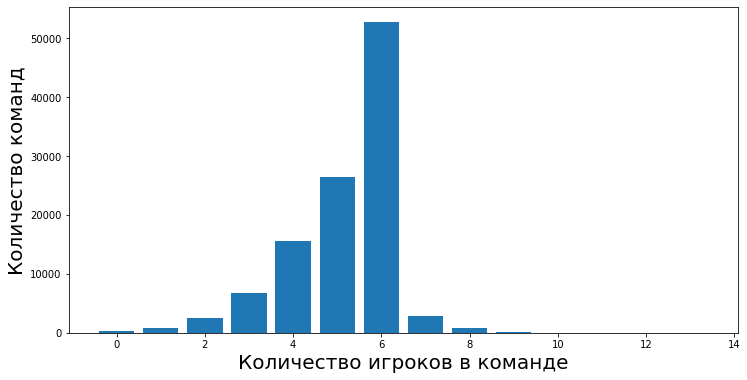

In [133]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(members.keys(), members.values())
ax.set_xlabel("Количество игроков в команде", fontsize=20)
ax.set_ylabel("Количество команд", fontsize=20)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()